<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/whitenoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelling & Analyzing (Gaussian) White Noise Processes

# What is a white noise process?

* Follow a stationary process
* Is normally distributed
* No autocorrelation present

# Create White Noise Process

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from scipy import stats
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
seed(1)
series = [gauss(0.0, 1.0) for i in range(5000)]
series = Series(series)
#series = pd.DataFrame(data=series)

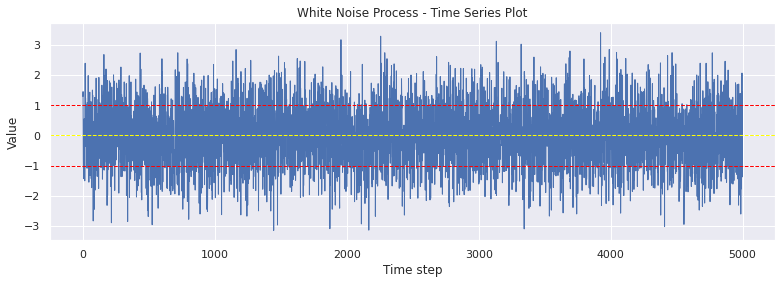

In [39]:
sns.set(rc={'figure.figsize':(13, 4)})
series.plot(linewidth=1.0,title='White Noise Process - Time Series Plot')
plt.ylabel('Value')
plt.xlabel('Time step')
plt.axhline(y=1, color='red', linestyle='--', linewidth=1.0);
plt.axhline(y=-1, color='red', linestyle='--', linewidth=1.0);
plt.axhline(y=0, color='yellow', linestyle='--', linewidth=1.0);

In [8]:
series.describe(percentiles=[0.05, 0.95])

,0
count,3000.000000
mean,0.007780
std,0.995494
min,-3.149965
5%,-1.668464
50%,0.005181
95%,1.640724
max,3.284978


In [0]:
series.skew()

-0.04977536942634736

In [0]:
series.kurt()

-0.13723426818327544

In [0]:
series.quantile(0.95)

1.6407238550995906

# **What is the distribution?**

<font color='blue'>**Hypothesis**: Gaussian white noise follows a normal distribution</font>

**Distribution Plot**

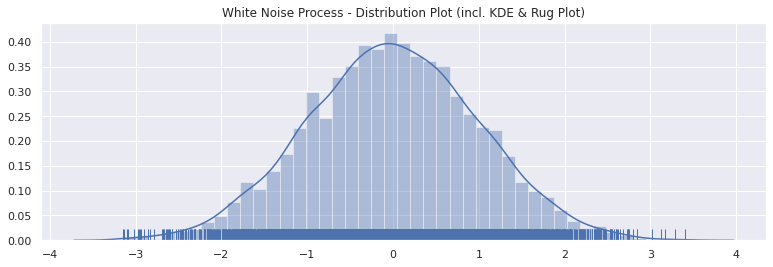

In [40]:
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((series), hist=True, rug=True).set_title('White Noise Process - Distribution Plot (incl. KDE & Rug Plot)')
plt.show()

**KDE Plot**

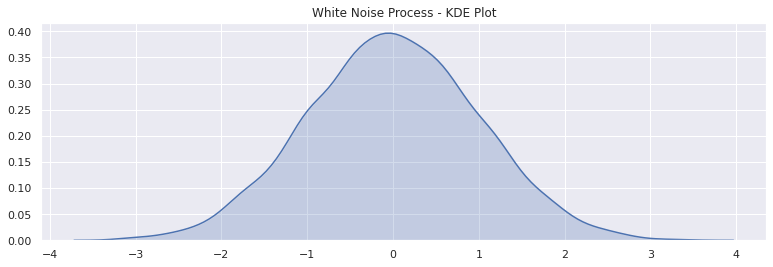

In [41]:
sns.set(rc={'figure.figsize':(13, 4)})
sns.kdeplot(series, shade=True).set_title('White Noise Process - KDE Plot')
plt.show()

**Boxplot**

Text(0.5, 1.0, 'White Noise Process - Boxplot')

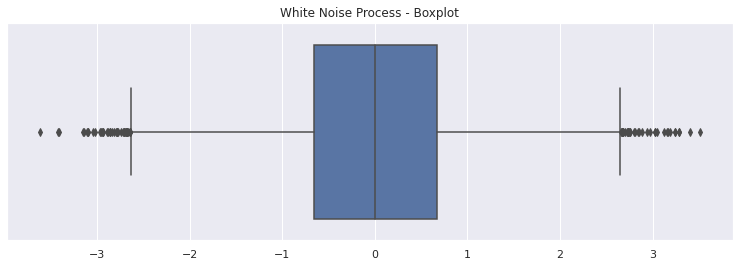

In [26]:
sns.boxplot(series).set_title('White Noise Process - Boxplot')

**QQ Plot**

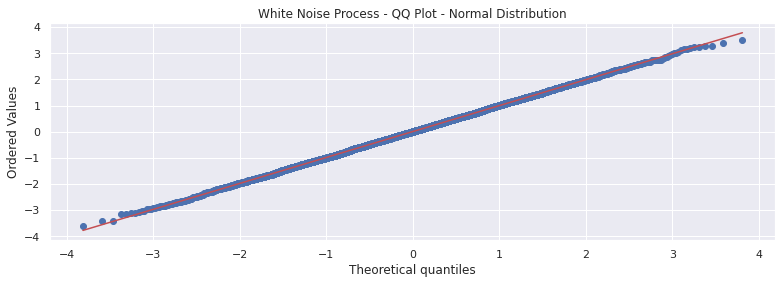

In [27]:
stats.probplot(series, dist="norm", plot=plt)
plt.title('White Noise Process - QQ Plot - Normal Distribution')
plt.show()

**Kolmogorov-Smirnov Test**

* Test of the distribution G(x) of an observed random variable against a given distribution F(x) (quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples.)
* Under null hypothesis the two distributions are identical, G(x)=F(x).
* Only works if the mean and the variance of the normal are assumed known under the null hypothesis

In [1]:
stats.kstest(series, 'norm')

NameError: ignored

P-value > 0.05. Don't reject HO. Distribution is normal.

**Jarque-Bera Test**

* Compares sample skewness and kurtosis to 0 and 3, their values under normality.
* This test only works for a large enough number of data samples (>2000) as the test statistic asymptotically has a Chi-squared distribution with 2 degrees of freedom.
* Null hypothesis: sample is normal distributed.

In [30]:
stats.jarque_bera(series)

(1.3300214148442122, 0.5142680211923731)

P-value > 0.05. Don't reject HO. Distribution is normal.

**Anderson-Darling Test**

* Anderson Darling tests the null hypothesis whether the sample from the population follows a particular distribution (default: normal).
* For the Anderson-Darling test, the critical values depend on which distribution is being tested against. 
* This function works for normal, exponential, logistic, or Gumbel (Extreme Value Type I) distributions.



In [31]:
stats.anderson(series)

AndersonResult(statistic=0.2851037944037671, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

P-value > 0.05. Don't reject HO. Distribution is normal.

# **Is there autocorrelation?**

<font color='blue'>**Hypothesis**: There is no autocorrelation</font>

**Autocorrelation Plot**

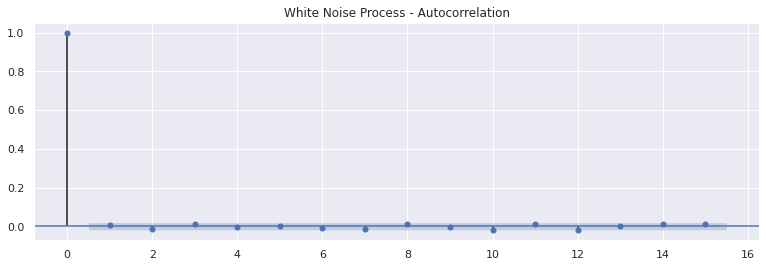

In [32]:
sns.set(rc={'figure.figsize':(13, 4)})
sm.graphics.tsa.plot_acf(series.squeeze(), lags=15)
plt.title('White Noise Process - Autocorrelation')
plt.show()

**Partial Autocorrelation Lag Plot**

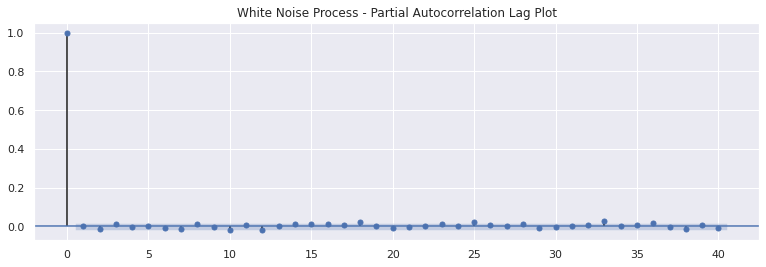

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series)
plt.title('White Noise Process - Partial Autocorrelation Lag Plot')
plt.show()

**Lag Plot**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


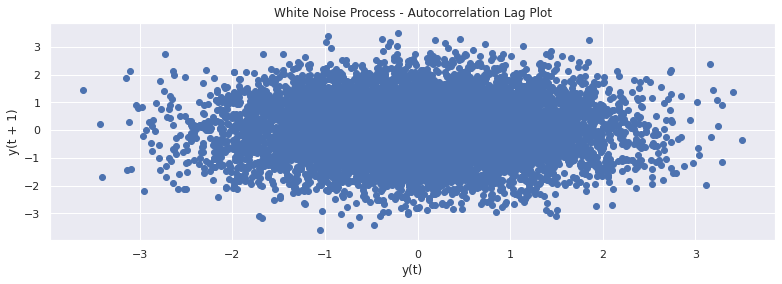

In [34]:
from pandas.plotting import lag_plot
lag_plot(series)
plt.title('White Noise Process - Autocorrelation Lag Plot')
plt.show()

**Ljung-Box Q Statistic**

In [35]:
# Ljung-Box Q Statistic
# Returns Ljung-Box Q-statistic for autocorrelation parameters and p-value
# examining the null hypothesis of independence in a given time series. These are sometimes known as ‘portmanteau’ tests.
statsmodels.tsa.stattools.q_stat(series, nobs=3000, type='ljungbox')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:469: RuntimeWarning: divide by zero encountered in true_divide
  np.cumsum((1. / (nobs - np.arange(1, len(x) + 1))) * x**2))


(array([ 4983.23979463, 11294.32668878, 11307.55003164, ...,
                   inf,            inf,            inf]),
 array([0., 0., 0., ..., 0., 0., 0.]))

**Durban-Watson Statistic**

In [36]:
# Durbin-Watson test to assess autocorrelation
# The null hypothesis of the test is that there is no serial correlation
# This statistic will always be between 0 and 4. 
# The closer to 0 the statistic, the more evidence for positive serial correlation. 
# The closer to 4, the more evidence for negative serial correlation.
# Close to 2 means no autocorrelation present
statsmodels.stats.stattools.durbin_watson(series, axis=0)

1.9904723037107692

**Breusch–Godfrey Test**

In [0]:
# 

# **Is the series stationarity?**

<font color='blue'>**Hypothesis**: There is no unit root</font>

**BDS Independence Test**

In [28]:
# BDS test statistic for independence of a time series
# Time Series is IID (= Null Hypothesis)
statsmodels.tsa.stattools.bds(series, max_dim=2, epsilon=None, distance=1.5)

(array(1.68146833), array(0.09267198))

**Augmented Dickey Fuller Test**

The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.

H0: There is a unit root for the series (non stationary)

Ha: There is no unit root for the series. The series is stationary.

Reject H0 if p-value of less than 5% and test stats higher than provided critical values

Choose regression {‘c’,’ct’,’ctt’,’nc’} - Constant and trend order to include in regression.

* ‘c’ : constant only (default).
* ‘ct’ : constant and trend.
* ‘ctt’ : constant, and linear and quadratic trend.
* ‘nc’ : no constant, no trend.

In [37]:
# no constant, no trend
from statsmodels.tsa.stattools import adfuller
statsmodels.tsa.stattools.adfuller(series, maxlag=None, regression='nc', autolag='AIC', store=False, regresults=False)

(-99.53117854704499,
 0.0,
 0,
 9999,
 {'1%': -2.565963638637491,
  '10%': -1.6167934644637916,
  '5%': -1.9410268963117674},
 28125.692581947613)

Test stats is much higher than all provided critical values. p-value is zero (below 0.05 significance). Reject H0. Series is stationary.

**KPSS - Level Stationarity Test**

‘c’ : The data is stationary around a constant (default).

H0 = Stationary (Stochastic Trend). H1 = Non-Stationary (Unit Root)

Reject H0 if p-value of less than 5% and test stats higher than provided critical values

In [0]:
statsmodels.tsa.stattools.kpss(series, regression='c', lags='auto', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.0817744274787518,
 0.1,
 1,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

Test statistics at 0.07 is not more extreme than the provided critical value of 0.46 for 5%. p-value is not below 0.05. Do not reject H0. Process is stationary around a constant.


**KPSS - Trend Stationary Test**

‘ct’ : The data is stationary around a trend.

H0 = Deterministic Trend. H1 = Non-Stationary (Unit Root)

Reject H0 if p-value of less than 5% and test stats higher than provided critical values

In [0]:
statsmodels.tsa.stattools.kpss(series, regression='ct', lags='auto', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.08072962002899656,
 0.1,
 1,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

Test statistics is smaller than provided critical value of 0.146. p-value is at 0.1 (“not significant”). Do not reject H0.

Summary: Both test show no unit root. Time series is either trend or level stationary.